In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [13]:
def GaussieNoisy(image,sigma):
    row,col,ch=image.shape
    mean=0
    gauss=np.random.normal(mean,sigma,(row,col,ch))
    gauss=gauss.reshape(row,col,ch)
    noisy=image+gauss
    return noisy.astype(np.uint8)

In [3]:
def spNoisy(image,s_vs_p=0.5,amount=0.004):
    row,col,ch=image.shape
    
    out=np.copy(image)
    num_salt=np.ceil(amount * image.size *s_vs_p)
    coords=[np.random.randint(0,i-1,int(num_salt)) for i in image.shape]
    out[coords]=1
    num_pepper=np.ceil(amount*image.size*(1-0.5))
    coords=[np.random.randint(0,i-1,int(num_pepper)) for i in image.shape]
    out[coords]=0
    return out

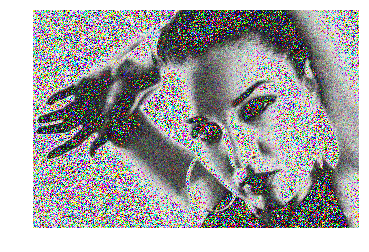

In [4]:
apple=cv2.imread(r'D:\3.jpg')
#apple=cv2.resize(cv2.cvtColor(apple,cv2.COLOR_BGR2RGB),(400,800))
plt.imshow(GaussieNoisy(apple,26))
#plt.imshow(spNoisy(apple,26))
plt.savefig(r'D:\3_1.jpg')
plt.axis('off')
plt.show()

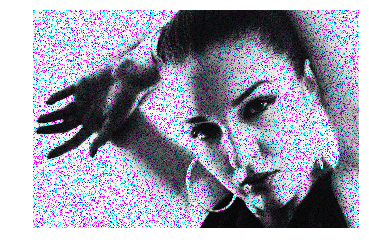

In [5]:
apple=cv2.imread(r'D:\3.jpg')
#apple=cv2.resize(cv2.cvtColor(apple,cv2.COLOR_BGR2RGB),(400,800))
#plt.imshow(GaussieNoisy(apple,26))
plt.imshow(spNoisy(apple,26))
plt.savefig(r'D:\3_2.jpg')
plt.axis('off')
plt.show()

In [6]:
def Filter (image,array):
    #w=image.width
   # h=image.height
    #size=(w,h)
    w=image.shape[0]
    h=image.shape[1]
    size=(w,h)
    iFilter=cv2.CreateImage(size,8,1)
    for i in range(h):
        for j in range(w):
            if i in [0,h-1] or j in [0,w-1]:
                iFileter[i,j]=image[i,j]
            else:
                a=[0]*9
                for k in range(3):
                    for l in range(3):
                        a[k*3+1]=image[i-1+k,j-1]
                sum=0
                for m in range(9):
                    sum=sum+array[m]*a[m]
                iFilter[i,j]=int(sum)
    return iFilter
                    

In [7]:
H1 = [1.0/9]*9
H2 = [1.0/10]*9
H2[4] = 0.2
H3 = [1.0/16,2.0/16,1.0/16,2.0/16,4.0/16,2.0/16,1.0/16,2.0/16,1.0/16]
H4 = [1.0/8]*9
H4[4] = 0

image = cv2.imread(r'D:\1_3.jpg',0)
iH1F = Filter(image,H1)
iH2F = Filter(image,H2)
iH3F = Filter(image,H3)
iH4F = Filter(image,H4)
cv2.ShowImage('image',image)
cv2.ShowImage('iH1F',iH1F)
cv2.ShowImage('iH2F',iH2F)
cv2.ShowImage('iH3F',iH3F)
cv2.ShowImage('iH4F',iH4F)
cv2.WaitKey(0)

AttributeError: module 'cv2.cv2' has no attribute 'CreateImage'

In [9]:
from skimage import data,color
import matplotlib.pyplot as plt
from skimage.morphology import disk
import skimage.filters.rank as sfr
from PIL import Image
from pylab import *
img =array(Image.open(r'D:\3_1.jpg'))
dst =sfr.mean(img, disk(5)) #半径为5的圆形滤波器
 
plt.figure('filters',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
 
plt.subplot(122)
plt.title('filted image')
plt.imshow(dst,plt.cm.gray)



ValueError: The parameter `image` must be a 2-dimensional array

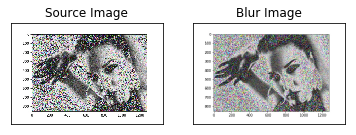

In [49]:
img=cv2.imread(r'D:\3_1.jpg')
source=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

result=cv2.blur(source,(3,3))#均值滤波

titles = ['Source Image', 'Blur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  

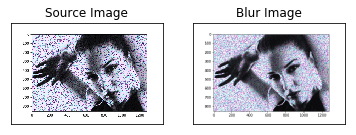

In [50]:
img=cv2.imread(r'D:\3_2.jpg')
source=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

result=cv2.blur(source,(3,3))#均值滤波

titles = ['Source Image', 'Blur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  

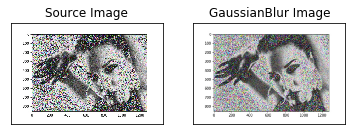

In [51]:
img=cv2.imread(r'D:\3_1.jpg')
source = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#高斯滤波
result = cv2.GaussianBlur(source, (3,3), 0)

#显示图形
titles = ['Source Image', 'GaussianBlur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  

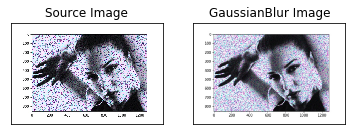

In [52]:
img=cv2.imread(r'D:\3_2.jpg')
source = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#高斯滤波
result = cv2.GaussianBlur(source, (3,3), 0)

#显示图形
titles = ['Source Image', 'GaussianBlur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  

In [46]:
img=cv2.imread(r'D:\3_1.jpg')

#中值滤波
result = cv2.medianBlur(img, 3)

#显示图像
cv2.imshow("source img", img)
cv2.imshow("medianBlur", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
img=cv2.imread(r'D:\3_2.jpg')

#中值滤波
result = cv2.medianBlur(img, 3)

#显示图像
cv2.imshow("source img", img)
cv2.imshow("medianBlur", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
ima=cv2.imread(r'D:\3.jpg') #读入图像

bw1 = edge(ima,'sobel') #sobel算子锐化
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')#图像显示
subplot(122)
imshow(bw1)
title('sobel算子锐化');

bw2 = edge(ima,'prewitt')#prewitt算子锐化
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')
subplot(122)
imshow(bw2)
title('prewitt算子锐化')

bw3 = edge(ima,'roberts')#roberts算子锐化
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')
subplot(122)
imshow(bw3)
title('roberts算子锐化')

bw4 = edge(ima,'log')#log算子锐化
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')
subplot(122)
imshow(bw4)
title('log算子锐化')

bw5 = edge(ima,'canny')#nny算子锐化
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')
subplot(122)
imshow(bw5)
title('canny算子锐化')

h1=fspecial('gaussian',[9,9])#gaussian低通滤波器锐化
bw6 = imfilter(ima,h1)
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')
subplot(122)
imshow(uint8(bw6))
title('gaussian低通滤波器锐化')

h2=fspecial('laplacian')#laplacian算子锐化
bw7 = imfilter(ima,h1)
figure
subplot(121)
imshow(uint8(ima))
title('原始图像')
subplot(122)
imshow(uint8(bw7))
title('laplacian算子锐化')

NameError: name 'edge' is not defined

In [41]:
rgb = cv2.imread("D:/3.jpg")
weight=rgb.shape[0]
height=rgb.shape[1]
number=rgb.shape[2]

grayimg=np.zeros((img.shape[0],img.shape[1],1),np.uint8)

t1 = list([[0,1,0],
           [1,-5,1],
           [0,1,0]]) # 定义拉普拉斯滤波器

shp=np.pad(grayimg,((1, 1), (1, 1),(0,0)),"constant",constant_values=0) # 为原图片加一层边缘
for i in range(1,weight-1):
    for j in range(1,height-1):
        shp[i,j]=abs(np.sum(shp[i:i+3,j:j+3]*t1)) # 对灰度图进行锐化

cv2.imshow("Laplacian",grayimg+shp[1:shp.shape[0]-1,1:shp.shape[1]-1])
cv2.waitKey(0)
cv2.destroyAllWindow()

ValueError: operands could not be broadcast together with shapes (3,2,1) (3,3) 

In [53]:
#锐化
img=cv2.imread(r"D:\3.jpg")

# 1
blur=cv2.GaussianBlur(img,(0,0),3)
image=cv2.addWeighted(img,1.5,blur,-0.5,0)
# 2
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
image = cv2.filter2D(img, -1, kernel)
# 3
image=cv2.bilateralFilter(img,9,75,75)
# 4
sigma = 1; threshold = 5; amount = 1
blurred=cv2.GaussianBlur(img,(0,0),1,None,1)
lowContrastMask = abs(img - blurred) < threshold
sharpened = img*(1+amount) + blurred*(-amount)
image=cv2.bitwise_or(sharpened.astype(np.uint8),lowContrastMask.astype(np.uint8))

cv2.namedWindow("dst",cv2.WINDOW_FREERATIO)
cv2.imshow("dst",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
img=cv2.imread(r"D:\3.jpg")


kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

image = cv2.filter2D(img, -1, kernel)


cv2.namedWindow("dst",cv2.WINDOW_FREERATIO)
cv2.imshow("dst",image)
cv2.waitKey(0)
cv2.destroyAllWindows()